# 2. Simple Image Recognition

In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

/anaconda/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# load data
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

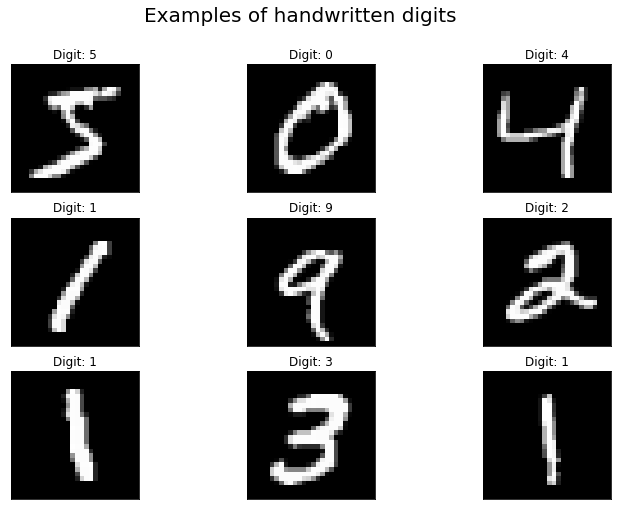

In [3]:
# visualize data
fig = plt.figure(figsize=(12, 8))

plt.suptitle("Examples of handwritten digits", fontsize=20)
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

plt.show()

In [4]:
# pre-process images
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_valid = X_valid.reshape(X_valid.shape[0], num_pixels).astype('float32')

X_train = X_train / 255.
X_valid = X_valid / 255.

In [5]:
# convert labels to categorical vectors
y_train_categorical = np_utils.to_categorical(y_train)
y_valid_categorical = np_utils.to_categorical(y_valid)
num_classes = y_train_categorical.shape[1]
print(num_classes)

10


<img src="images/Network.png" width=400/>

In [8]:
# create model
digit_predictor = Sequential()

digit_predictor.add(Dense(units=num_pixels, activation="relu", input_dim=num_pixels))
digit_predictor.add(Dense(num_classes, activation='softmax'))

digit_predictor.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [9]:
# train model
digit_predictor.fit(X_train, y_train_categorical, epochs=5, batch_size=1000, verbose=1)

Epoch 1/5
60000/60000 [==============================] - 185s 3ms/step - loss: 0.4864 - acc: 0.8581
Epoch 2/5
60000/60000 [==============================] - 128s 2ms/step - loss: 0.2176 - acc: 0.9373
Epoch 3/5
60000/60000 [==============================] - 179s 3ms/step - loss: 0.1528 - acc: 0.9559
Epoch 4/5
60000/60000 [==============================] - 125s 2ms/step - loss: 0.1148 - acc: 0.9659
Epoch 5/5
60000/60000 [==============================] - 122s 2ms/step - loss: 0.0899 - acc: 0.9740


In [10]:
# evaluate on validation data
validation_scores = digit_predictor.evaluate(X_valid, y_valid_categorical, verbose=0)
print("Validation accuracy: {}%".format(validation_scores[1] * 100))

Validation accuracy: 96.66%


In [11]:
# get all predictions on validation data
y_pred = digit_predictor.predict_classes(X_valid).reshape(-1)

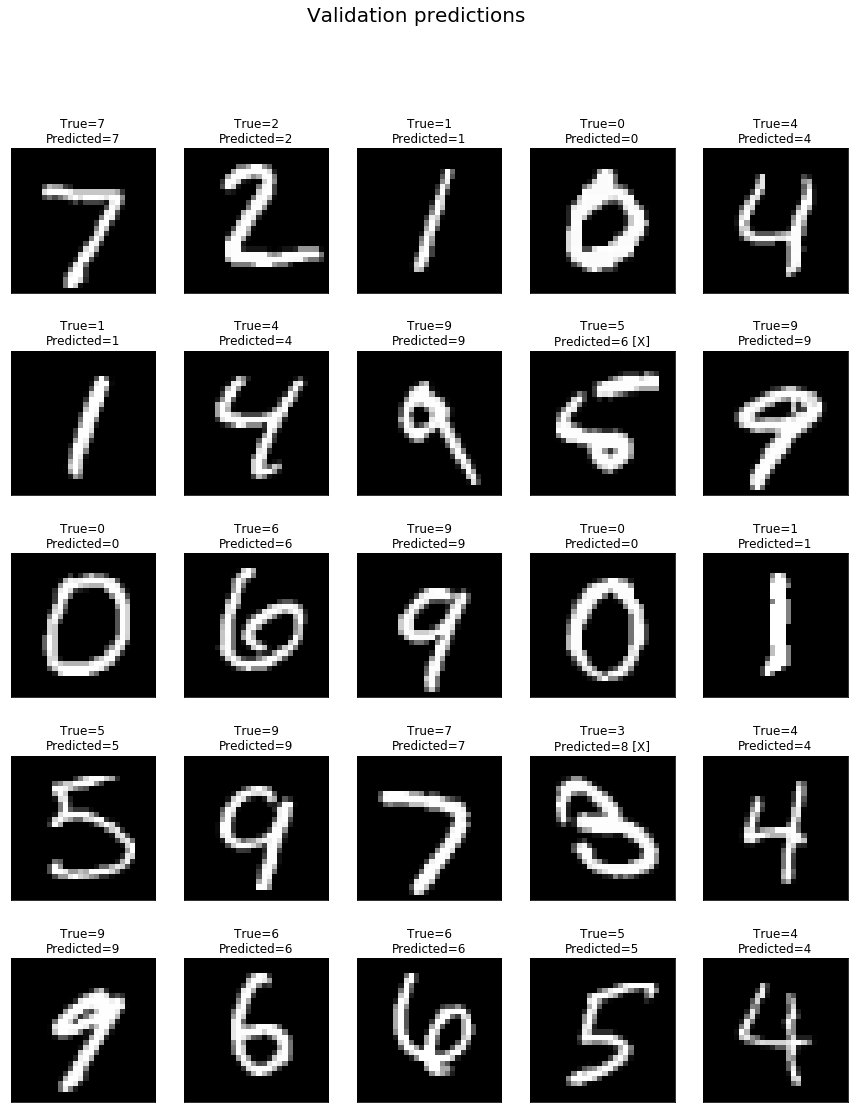

In [12]:
# visualize a few predictions on validation data
cols = 5
rows = 5
fig, ax = plt.subplots(rows, cols, figsize=(15, 18))
fig.suptitle("Validation predictions", fontsize=20)

v = 0
for row in range(0, rows): 
    for col in range(0, cols):
        ax[row][col].imshow(X_valid[v].reshape(28, 28), cmap="gray")
        title = "True=%s\nPredicted=%s" % (y_valid[v], y_pred[v])
        if y_valid[v] != y_pred[v]:
            title += " [X]"
        ax[row][col].set_title(title)
        ax[row][col].set_yticks([])
        ax[row][col].set_xticks([])
        v += 1

plt.show()